# Homework 4

In [5]:
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
class_df = pd.read_csv('CSCI_Spring_2025_survey.csv')
class_df.head
for col in class_df.columns:
    print(col)
class_df.dtypes


Timestamp
What is your name?
What are your pronouns?
What state/country were you born in?
How many siblings do you have?
How much experience do you have programming?
What class are you in? 
Are you working while in school?
How many pets and of which kind do you have?
What is your favorite type of food?
Where do you live?
Do you take the metro?
What is your major?
How old are you?
What is your favorite TV show?
What is your favorite video game?
What is your favorite book?
Why are you taking this class? 
Whats your favorite bash command?


Timestamp                                         str
What is your name?                                str
What are your pronouns?                           str
What state/country were you born in?              str
How many siblings do you have?                  int64
How much experience do you have programming?      str
What class are you in?                            str
Are you working while in school?                  str
How many pets and of which kind do you have?      str
What is your favorite type of food?               str
Where do you live?                                str
Do you take the metro?                            str
What is your major?                               str
How old are you?                                int64
What is your favorite TV show?                    str
What is your favorite video game?                 str
What is your favorite book?                       str
Why are you taking this class?                    str
Whats your favorite bash com

In [6]:
# Standardize the country/state that people are from
class_df['What state/country were you born in?']=class_df['What state/country were you born in?'].str.replace(" ", "").str.lower()
class_df['Country/State of Origin']=np.where(class_df['What state/country were you born in?']=='frankfurt,germany','germany',
                                             np.where(class_df['What state/country were you born in?']=='st.louis,mo', 'missouri',
                                                 np.where(class_df['What state/country were you born in?']=='st.louismo','missouri',
                                                          np.where(class_df['What state/country were you born in?']=='missouri,usa','missouri',
                                                                   np.where(class_df['What state/country were you born in?']=='saintlouis,missouri','missouri',
                                                                            np.where(class_df['What state/country were you born in?']=='kansas,overlandpark', 'kansas',
                                                                                     np.where(class_df['What state/country were you born in?']=='unitedstatesmissouri','missouri',
                                                                                        np.where(class_df['What state/country were you born in?']=='seoul,southkorea','southkorea',
                                                                                         np.where(class_df['What state/country were you born in?']=='iwasborninchandigarh,india!','india',class_df['What state/country were you born in?']
                                                                                                          )))))))))
class_df['Country/State of Origin']

0                             mexico
1                           missouri
2                            germany
3                          wisconsin
4                           missouri
5                           missouri
6                              india
7                           missouri
8                           missouri
9     georgia(thecountrynotthestate)
10                          missouri
11                          missouri
12                         newjersey
13                          missouri
14                          missouri
15                          missouri
16                            kansas
17                          missouri
18                          missouri
19                          oklahoma
20                             india
21           people'srepublicofchina
22                             india
23                          cameroon
24                             texas
25                        kazakhstah
26                             india
2

In [7]:
# Standardize the pets
class_df['How many pets and of which kind do you have?']=class_df['How many pets and of which kind do you have?'].str.replace(" ", "").str.lower().str.replace("'","")
class_df['number of pets']=np.where(class_df['How many pets and of which kind do you have?']=='1,dog','1',
                                np.where(class_df['How many pets and of which kind do you have?']=='nopets!','0',
                                         np.where(class_df['How many pets and of which kind do you have?']=='ihavetwodogsandtheyarebothathome','2',
                                                  np.where(class_df['How many pets and of which kind do you have?']=='none','0',
                                                           np.where(class_df['How many pets and of which kind do you have?']=='NaN','0',
                                                                    np.where(class_df['How many pets and of which kind do you have?']=='1dogand1cat','2',
                                                                             np.where(class_df['How many pets and of which kind do you have?']=='ihavetwodogs.theyrebernedoodles.','2',
                                                                                      np.where(class_df['How many pets and of which kind do you have?']=='2,grumpytheexoticshorthairwheterchromiaandmydogfurballisarescuebutheisjustascute','2',
                                                                                             np.where(class_df['How many pets and of which kind do you have?']=='2minatureschnauzers','2',
                                                                                                      np.where(class_df['How many pets and of which kind do you have?']=='2dogs','2',
                                                                                                               np.where(class_df['How many pets and of which kind do you have?']=='2,dogs.','2',
                                                                                                                        np.where(class_df['How many pets and of which kind do you have?']=='none:(butireallywantacat!','0',
                                                                                                                                 np.where(class_df['How many pets and of which kind do you have?']=='1cat;6dogs(overtwohouseholds)','7',
                                                                                                                                          np.where(class_df['How many pets and of which kind do you have?']=='had8dogs,notanymore','0',
                                                                                                                                                   np.where(class_df['How many pets and of which kind do you have?']=='nopets','0',
                                                                                                                                                            np.where(class_df['How many pets and of which kind do you have?']=='threedogs','3',
                                                                                                                                                                     np.where(class_df['How many pets and of which kind do you have?']=='1-dog','1',
                                                                                                                                                                              np.where(class_df['How many pets and of which kind do you have?']=='2dogs','2',
                                                                                                                                                                                       np.where(class_df['How many pets and of which kind do you have?']=='1,dog,microminigoldendoodle.','1',
                                                                                                                                                                                          np.where(class_df['How many pets and of which kind do you have?']=='2cats,onedog','3',      
                                                                                                                                                                                             np.where(class_df['How many pets and of which kind do you have?']=='ihave2cats,andoneisablackcatandotherisatabby','2', class_df['How many pets and of which kind do you have?']
                                                                                                                                                                                             )))))))))))))))))))))    
class_df['number of pets'] = (class_df['number of pets']).astype('Int64')   
class_df['number of pets']                          

0        1
1        0
2        0
3        2
4        0
5        0
6        0
7     <NA>
8        2
9        3
10       0
11       2
12       0
13       0
14       1
15       0
16       2
17       2
18       2
19       2
20       0
21       7
22       0
23       0
24       3
25       0
26    <NA>
27       1
28       0
29    <NA>
30       2
31       0
32       0
33       1
34       2
Name: number of pets, dtype: Int64

In [8]:
# Standardize the ages
class_df['age']=class_df['How old are you?']
class_df['age']

0     18
1     18
2     18
3     21
4     18
5     18
6     18
7     18
8     18
9     19
10    18
11    18
12    18
13    19
14    18
15    18
16    20
17    18
18    18
19    18
20    18
21    21
22    19
23    18
24    19
25    17
26    19
27    19
28    19
29    19
30    20
31    21
32    19
33    18
34    19
Name: age, dtype: int64

In [9]:
# Standardize the favorite food
class_df['What is your favorite type of food?']
class_df['Favorite type of food']=class_df['What is your favorite type of food?'].str.replace(" ", "").str.lower()
class_df['Favorite type of food']


0          japanese
1           mexican
2           italian
3           italian
4          american
5          japanese
6            indian
7           mexican
8           chinese
9           mexican
10         american
11          italian
12           indian
13          italian
14          mexican
15           indian
16         japanese
17          italian
18    alloftheabove
19         american
20          italian
21         japanese
22         japanese
23          chinese
24           korean
25          mexican
26         japanese
27          italian
28         american
29         american
30          chinese
31           indian
32       vietnamese
33           german
34         japanese
Name: Favorite type of food, dtype: str

In [10]:
# Standardize the majors
class_df['What is your major?']=class_df['What is your major?'].str.replace(" ", "").str.lower()
class_df['What is your major?']
class_df['Major']=np.where(class_df['What is your major?']=='computerscience;consideringanadditionalmajororaminor','computerscience',
                     np.where(class_df['What is your major?']=='compsci', 'computerscience',
                              np.where(class_df['What is your major?']=='computerscience,b.a.(imightswitchtob.s.,butiwishtopursueacareerindigitaliplaw,eventually!)','computerscience',
                                       np.where(class_df['What is your major?']=='computerscienceba','computerscience', class_df['What is your major?']))))
class_df['Major']

0                          computerscience
1                              cs/business
2                              datascience
3                        businesseconomics
4                          computerscience
5                          computerscience
6                               cs/finance
7                          computerscience
8                          computerscience
9                              datascience
10                         computerscience
11                         computerscience
12                         computerscience
13                         computerscience
14                         computerscience
15                         computerscience
16           biologyw/evolutionarybiominor
17                         computerscience
18                             datascience
19                         computerscience
20                         computerscience
21                                     tbd
22                         computerscience
23         

Text(0.5, 1.0, 'Histogram of Majors in class')

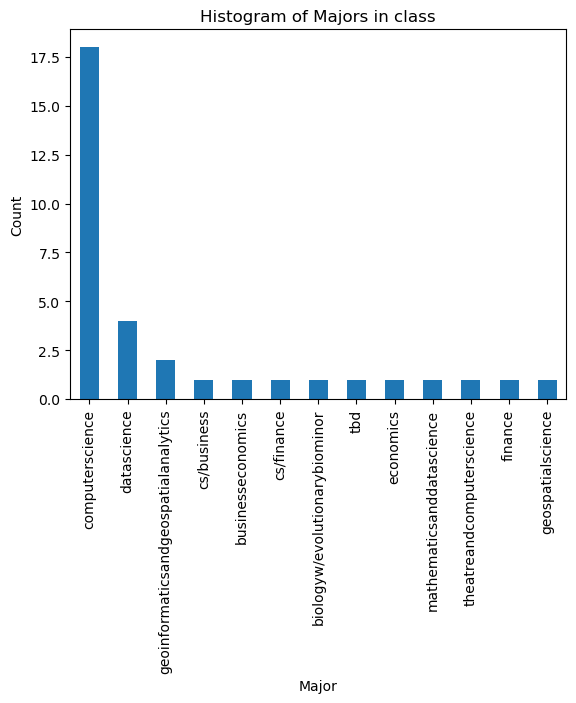

In [27]:
# Histogram showing the distribution of majors in this class
class_df_major=class_df['Major'].value_counts()
class_df_major.plot(kind="bar")
plt.xlabel("Major")
plt.ylabel("Count")
plt.title("Histogram of Majors in class")

# Here we see a histogram that shows the majors in our class. It shows how the majority of students are computer science majors with a range of other majors making up the rest of the data

Text(0, 0.5, 'count')

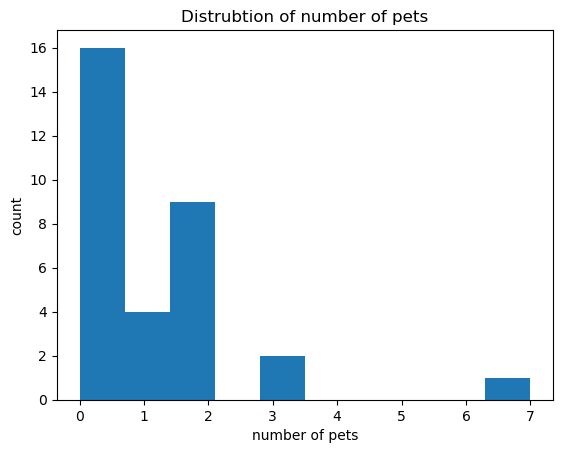

In [ ]:
# Histogram visualized the distrubition of number of pets
plt.hist(class_df['number of pets'])
plt.title("Distrubtion of number of pets")
plt.xlabel("number of pets")
plt.ylabel("count")
# here we see that the mode would be 0 but the mean and median would fall somewhere between 1 and 2

<Axes: >

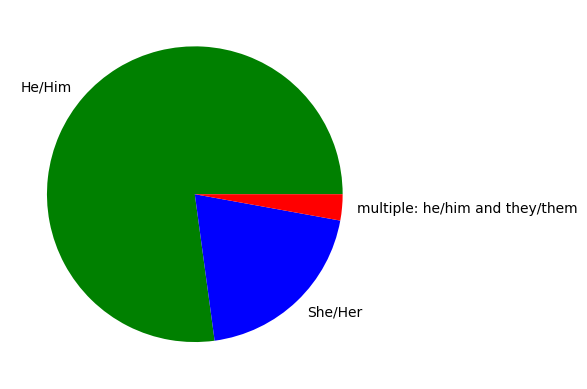

In [ ]:
# Pie chart of the classes pronouns
agg_pronoun = class_df.groupby("What are your pronouns?").count()
agg_pronoun

colors = ["green","blue","red"]
agg_pronoun.plot(kind="pie",y = "Timestamp", colors=colors, legend=False)

# We can see that a much larger portion of the class uses He/Him pronouns

Text(0.5, 1.0, 'Boxplot of age distrubution')

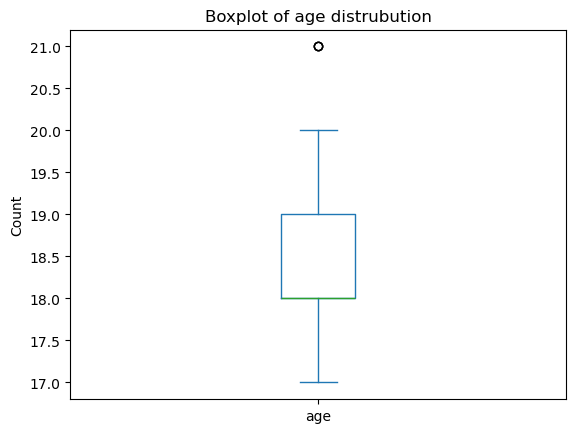

In [ ]:
# dotplot of favorite type of food
class_df_age=class_df['age']
class_df_age.plot(kind="box")

plt.ylabel("Count")
plt.title("Boxplot of age distrubution")

# Here we can see that the mean age in our class is 18, with the majority of our class falling between 18 and 19 with an outlier at 21

Text(0.5, 1.0, 'Do you take the metro?')

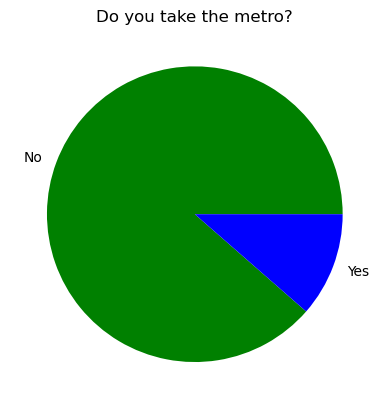

In [ ]:
# Piechart of who rides the metro
agg_metro = class_df.groupby("Do you take the metro?").count()
agg_metro

colors = ["green","blue"]
agg_metro.plot(kind="pie",y = "Timestamp", colors=colors, legend=False)
plt.title("Do you take the metro?")
# here we can see a much larger percentage of the class does not ride the metro